# 直方图
这是澳大利亚各种职业的薪水直方图。数据集中的每一行包含该职业的平均薪水，因此计数是职业的计数。 
![直方图](./picture/2-1.png)
提示：点击图片可以放大，这样查看的会更清晰。数据来源：https://github.com/rfordatascience/tidytuesday/blob/master/data/2018/2018-04-23/week4_australian_salary.csv   
![](./picture/2-2.png)
数据集的字段的含义是：  
✭gender_rank：职业在性别中的排名；  
✭occupation：职业；  
✭gender：性别；  
✭individuals：各职业的统计人数；  
✭average_taxabl_income：职业平均薪资。  
选择题  
问题来了，根据直方图和数据集的描述，选择下列说法正确的选项：  
A. 直方图是右偏的。  
B. 最普遍的职业薪资范围是 56 万（加元）/年 ～ 58 万（加元）/年。  
C. 直方图是单峰的。  
D. 直方图是双峰的。  
E. 直方图是向左偏的。  
F.最普遍的职业薪资范围是 40k（加元）/年 ～ 60k（加元）/年。  
答案是 ACF 
都答对了吗？最普遍的职业薪资范围就是直方图中柱子最高的那个所对应的薪资区间。下面我们来一起跑代码。   


In [2]:
import pandas as pd

# 数据集使用的编码为（encoding），CP1252
df = pd.read_csv('./data/australian_salary.csv', encoding='CP1252', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2197 entries, 1 to 2197
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gender_rank             2197 non-null   int64 
 1   occupation              2197 non-null   object
 2   gender                  2197 non-null   object
 3   individuals             2197 non-null   int64 
 4   average_taxable_income  2197 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 103.0+ KB


直方图的外观在很大程度上受到其 bin 宽度的影响：它确定了直方图中每个条形图形在 x 轴上的位置以及间隔。  
如果 bin 太宽，我们将看不到分布形状的足够细节；如果 bin 太窄，分布的整体形状可能会被噪音掩盖。  
除了自己亲眼看一下图，否则很难知道「最佳」的 bin 宽度（虽然说目前有一些自动的算法来估计最佳的分割区间，但是往往并不十分好用）。  
下面给大家讲一个巴拿马一只可爱的小老鼠的故事。  
先介绍一下这只小老鼠：   
![](./picture/2-3.jpg)
✭它的名字叫 Agoutis（刺豚鼠），前脚有五个脚趾，后脚有三个脚趾。  
✭第一脚趾很小，尾巴很短或不存在且无毛。  
✭它可能长到 60 厘米（24英寸），重达 4 公斤（8.8 磅）。  
✭大多数种类的背上都是棕色，腹部则发白或浅黄色。  
✭毛皮可能有光泽的外观，然后以橙色闪烁。  
关于它们是昼夜动物还是夜间动物的报道有所不同，科学家们通过摄像机和人工智能研究了刺豚鼠的生活习性。  
我们来看看科学家的研究成果，这里您可以看到一组直方图：  
![](./picture/2-4.png)
它是巴拿马巴拉岛（Barra Colorado Island）上的一个照相机诱集装置抓拍到刺豚鼠（Agouti，啮齿动物）的直方图。  
当动物通过相机时，相机会记录拍摄照片时的时间戳，因此直方图显示了刺豚鼠一天中最活跃的时间的分布。  
提示：数据集来自https://figshare.com/articles/Activity_level_estimation_data/1160536  
![](./picture/2-5.png)  
数据集的字段是这样的：  
✭species：物种。  
✭time：被抓拍到的时间，用小数表示，通过 time x 24小时 可以得到相对于一天开始的小时数。  
这组直方图，从左到右、从上到下分别采用了 8.0, 4.0, 2.0, 1.0, 0.5, 0.25（单位：小时）作为 bin 的宽度来绘制直方图。  
这里值得一提的是，直方图的 bin 是以中午 12 点为对称轴向两侧排布的，对于一天中的 0～24 小时的分布统计来说，这通常会是一个好的选择。  
选择题  
下面问题来了，下面这些关于刺豚鼠的描述中，哪个是正确的呢？（提示：选择 bin 宽度合适的直方图，来解读刺豚鼠的生活习性）  
A. 刺豚鼠从「凌晨 4 点到下午 12 点」有较高的活动水平，从「下午 12 点到晚上 8 点」则有中等水平的活动。  
B. 刺豚鼠在日出后「上午 6:30 至上午 8:30」和日落前「下午 4 点至 下午 6 点」几个小时内最活跃。  
C. 在整个日照时间，刺豚鼠都表现出恒定的活动水平。  
D. 刺豚鼠的活动变化很大，全天都有十几个活动高峰期。  
刺豚鼠在日出后「上午 6:30 至上午 8:30」和日落前「下午 4 点至 下午 6 点」几个小时内最活跃。  
选择 1.0（小时）作为 bin 宽度绘制的直方图，能够更加清晰的反应刺豚鼠一天之中的活动密度。  
调整直⽅图中的数据桶  
下面我们来跑程序。  
运行下面的代码，拖拽「间隔（小时）」滑动条，改变 bin 的宽度，查看直方图的变化结果。这里分别采用了 8.0，4.0，2.0，1.0，0.5，0.25（单位：小时）作为 bin 的宽度来绘制直方图。  
下面是生成直方图所使用的数据集。  
运行下面的代码，先将需要用到的数据集读取进 Python 程序中，然后查看当前数据集的基本信息，根据输出的内容可以知道，当前数据集中有两列数据，分别为‘species’和‘time’，共有 17820 条数据。  
运行下面的代码，过滤数据集中的数据，查看所有'species'列的值为‘agouti’的数据，也就是所有刺豚鼠的数据。  

In [6]:
import sys
import pandas as pd
# sys.path.append('/data/course_data/visualization')

df_panama = pd.read_csv('./data/BCItime.txt', sep=' ')

# 数据集中包含 Agoutis 的部分
df_panama[df_panama['species'] == 'agouti']
# 数据集中还有其它物种的数据，可以通过下面的命令查看都有物种
df_panama['species'].unique()

array(['agouti', 'rat', 'peccary', 'ocelot', 'tayra', 'tamandua',
       'brocket', 'coati', 'squirrel', 'mouse', 'armadillo', 'opossum',
       'paca'], dtype=object)

通过上面代码运行的结果可以发现，除了'agouti'外，数据集中还有很多有意思的物种，比如‘paca’,中文名字叫做‘无尾刺豚鼠’，主要栖息于墨西哥到巴西的地底森林，在齧（niè）齿动物中它可不算是小可爱，它的体长可达 75 公分上下。具体样子可以看下图。  
运行下面代码，对比一下'paca'与'agouti'的生活习性有什么不同。  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000229330C15C8>]],
      dtype=object)

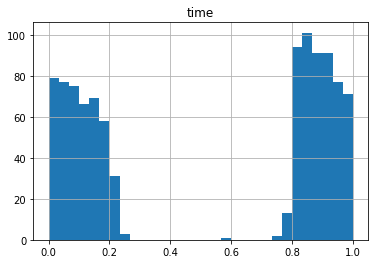

In [7]:
import sys
import pandas as pd
df_panama = pd.read_csv('./data/BCItime.txt', sep=' ')

# 看看 'rat' 的生活习性和 'agouti' 进行对比
df_panama[df_panama['species'] == 'paca'].hist(bins=30)